# Fund 27. Likelihood (MLE, MAP)
머신러닝 모델의 목표는 모델이 표현하는 확률 분포를 데이터의 실제 분포에 가깝게 만드는 최적의 파라미터 값을 찾는 것이다.  
## 확률 변수로서의 모델 파라미터
- 아래는 파라미터 공간에서 두 점 a, b를 뽑아서 y = ax + b의 그래프를 그리는 코드다. 
- 이론상으로는 실수 집합 전체에서 샘플링해야 하지만 코드로 구현하기가 불가능하기에 간단한 시각화를 위해 (-10, 10) 구간에서 샘플링했다. 

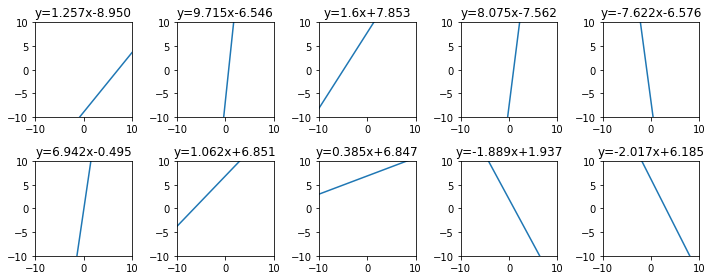

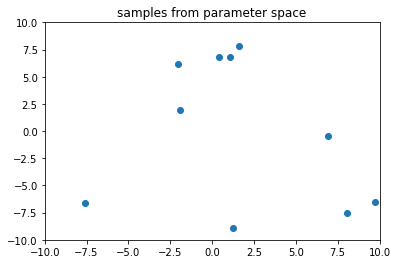

In [1]:
import numpy as np
import matplotlib.pyplot as plt

parameter_points = []
fig1, axes1 = plt.subplots(2, 5, figsize=(10, 4))

for ax in axes1.flatten():
    # np.random.uniform: 정해진 구간에서 수를 무작위로 추출하여 반환합니다.
    a, b = np.random.uniform(-10, 10, size=2)
    a = round(a, 3)
    b = round(b, 3)
    parameter_points.append((a, b))

    x = np.linspace(-10, 10, 50)
    y = a*x + b
    ax.plot(x, y)

    ax.set_title('y='+str(a)+'x'+'{0:+.03f}'.format(b))
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)

plt.tight_layout()

px, py = np.split(np.array(parameter_points), 2, axis=1)
fig2 = plt.figure()
axes2 = plt.gca()

axes2.set_title('samples from parameter space')
axes2.set_xlim(-10, 10)
axes2.set_ylim(-10, 10)

plt.scatter(px, py)
plt.show()

- 아래 코드는 평균이 (1, 0)이고 표준편차가 0.5인 정규분포에서 10개의 점을 무작위로 뽑은 다음, 대응되는 일차함수의 그래프를 각각 그려주는 코드다. 
- 위쪽의 예제와 비교하면 파라미터 공간에서 추출된 샘플이 (1, 0) 주위에 모여 있고, 결과 그래프들의 차이가 작은 것을 확인할 수 있다. 

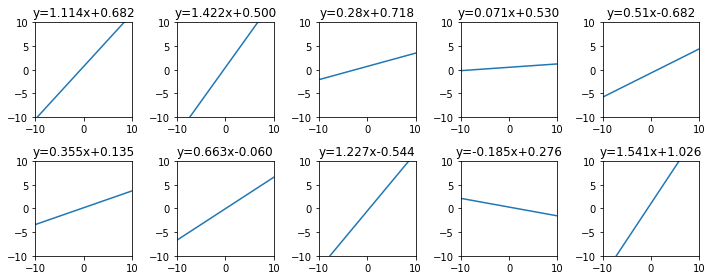

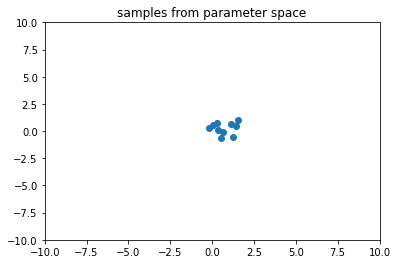

In [2]:
parameter_points = []
fig, axes1 = plt.subplots(2, 5, figsize=(10, 4))

for ax in axes1.flatten():
    # np.random.normal: 정규분포를 따르는 확률 변수의 랜덤한 값을 반환합니다.
    a, b = np.random.normal(loc=[1, 0], scale=0.5)
    a = round(a, 3)
    b = round(b, 3)
    parameter_points.append((a, b))

    x = np.linspace(-10, 10, 50)
    y = a*x + b
    ax.plot(x, y)

    ax.set_title('y='+str(a)+'x'+'{0:+.03f}'.format(b))
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)

plt.tight_layout()

px, py = np.split(np.array(parameter_points), 2, axis=1)
fig2 = plt.figure()
axes2 = plt.gca()

axes2.set_title('samples from parameter space')
axes2.set_xlim(-10, 10)
axes2.set_ylim(-10, 10)

plt.scatter(px, py)
plt.show()

## posterior와 prior, likelihood 사이의 관계
- 베이지안 머신러닝 모델은 데이터를 통해 파라미터 공간의 확률 분포를 학습한다. 
- 모델 파라미터를 고정된 값이 아닌 불확실성을 가진 확률 변수로 보는것, 데이터를 관찰하면서 업데이트되는 값으로 보는 것은 베이지안 머신러닝 모델의 핵심 아이디어다. 
- 데이터를 관찰하기 전 파라미터 공간에 주어진 확률 분포 $p(θ)$를 prior(사전 확률)이라고 한다. 이는 일반적인 정규분포일수도, 데이터의 특성을 반영한 확률 분포일 수도 있다. 
- prior 분포를 고정시킨다면, 주어진 파라미터 분포에 대해서 우리가 갖고 있는 데이터가 얼마나 '그럴듯한지' 계산할 수 있다. 이를 나타내는 값이 likelihood(가능도, 우도)다.  
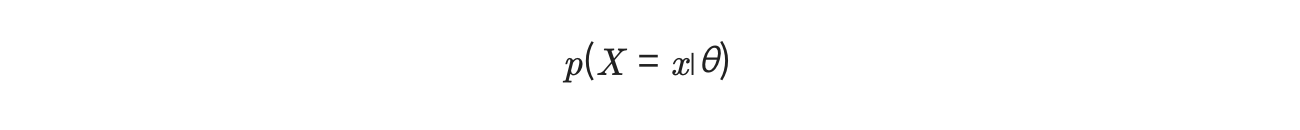

- 즉, 파라미터의 분포 $p(θ)$가 정해졌을 때 x라는 데이터가 관찰될 확률이다. 
- likelihood가 높다는 것은 우리가 지정한 파라미터 조건에서 데이터가 관찰될 확률이 높다는 것이고, 데이터의 분포를 모델이 잘 표현하는 것이라고 생각할 수 있다. 
- 이렇게 데이터들의 likelihood 값을 최대화하는 방향으로 모델을 학습시키는 방법을 **최대 가능도 추정(maximum likelihood estimation, MLE)**이라고 한다. 
- 반대로, 데이터 집합 $X$가 주어졌을 때, 파라미터 θ의 분포 $p(θ∣X)$를 생각해 볼 수도 있다. 이 값을 posterior(사후 확률)라고 부른다. 
- posterior를 직접 계산해서 최적의 $θ$값을 찾는 것이 아니라, prior와 likelihood에 관한 식으로 변형한 다음, 그 식ㅇ르 최대화하는 파라미터 $θ$를 찾는다. 
- 이렇게 posterior를 최대화하는 방향으로 모델을 학습시키는 방법을 최대 **사후 확률 추정(maximum posteriori estimation, MAP)**이라고 한다. 

## likelihood 감 잡기

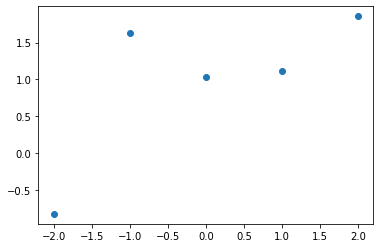

In [3]:
# 5개의 랜덤한 데이터 포인트를 생성하고 좌표평면 위에 표시해주는 코드
import math
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(321)

input_data = np.linspace(-2, 2, 5)
label = input_data + 1 + np.random.normal(0, 1, size=5)

plt.scatter(input_data, label)
plt.show()

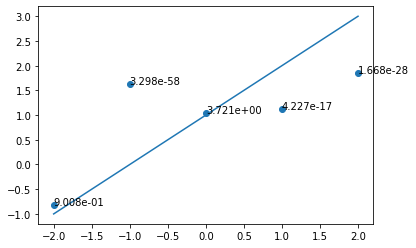

In [4]:
# model: y = ax + b
# a, b 값을 바꾸면서 실행해보세요
#-------------------------------#
a = 1
b = 1
#-------------------------------#

# 모델 예측값
model_output = a*input_data + b
likelihood = []

# x: 입력데이터, y: 데이터라벨
# 예측값과 라벨의 차이를 제곱해 exp에 사용
for x, y, output in zip(input_data, label, model_output):
    likelihood.append(1/(math.sqrt(2*math.pi*0.1*0.1))*math.exp(-pow(y-output,2)/(2*0.1*0.1)))

model_x = np.linspace(-2, 2, 50)
model_y = a*model_x + b

fig, ax = plt.subplots()
ax.scatter(input_data, label)
ax.plot(model_x, model_y)

for i, text in enumerate(likelihood):
    ax.annotate('%.3e'%text, (input_data[i], label[i]))

plt.show()

## MLE 최적해 구하기
- MLE를 이용해 최적의 파라미터를 찾아보고 데이터셋의 likelihood를 계산해 보도록 하자. 아래 코드는 y = x + 1 함수를 기준으로 랜덤한 노이즈를 섞어서 데이터포인트 20개를 생성하고 시각화하는 코드다. 노이즈의 분포는 평균이 0이고 표준편차가 0.5인 정규분포다. 

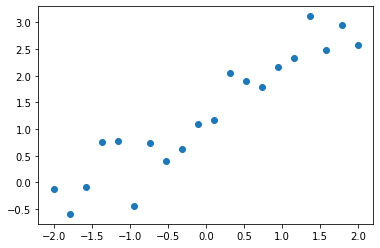

In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
num_samples = 20

input_data = np.linspace(-2, 2, num_samples)
labels = input_data + 1 + np.random.normal(0, 0.5, size=num_samples)

plt.scatter(input_data, labels)
plt.show()

In [6]:
def likelihood(labels, preds):
    result = 1/(np.sqrt(2*math.pi*0.1*0.1))*np.exp(-np.power(labels-preds,2)/(2*0.1*0.1))
    
    return np.prod(result)

def neg_log_likelihood(labels, preds):
    const_term = len(labels)*math.log(1/math.sqrt(2*math.pi*0.1*0.1))

    return (-1)*(const_term + 1/(2*0.1*0.1)*np.sum(-np.power(labels-preds,2)))

slope: 0.8578 bias: 1.2847
likelihood: 2.9724e-54
negative log likelihood: 1.2325e+02


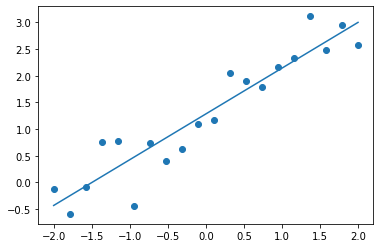

In [7]:
# X: 20x2 matrix, y: 20x1 matrix
# input_data 리스트를 column vector로 바꾼 다음 np.append 함수로 상수항을 추가합니다.
X = np.append(input_data.reshape((-1, 1)), np.ones((num_samples, 1)), axis=1)
y = labels

theta_1, theta_0 = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

print('slope: '+'%.4f'%theta_1+' bias: '+'%.4f'%theta_0)

predictions = theta_1 * input_data + theta_0
print('likelihood: '+'%.4e'%likelihood(labels, predictions))
print('negative log likelihood: '+'%.4e'%neg_log_likelihood(labels, predictions))

model_x = np.linspace(-2, 2, 50)
model_y = theta_1 * model_x + theta_0

plt.scatter(input_data, labels)
plt.plot(model_x, model_y)
plt.show()

## MAP : 최대 사후 확률 추정
- MLE의 최적해는 오로지 관측된 데이터 값에만 의존한다. 계산이 비교적 간단하지만, 관측된 데이터에 노이즈, 이상치가 존재하는 경우 모델의 안정성이 떨어진다. 
- MAP는 데이터셋이 주어졌을 때 파라미터의 분포, 즉 $p(θ∣X)$에서 확률 값을 최대화하는 파라미터 $θ$를 찾는다. 

## MLE와 MAP의 비교
- 이전 예제와 마찬가지로 y = x + 1 함수값에 랜덤한 노이즈를 더해서 데이터 포인트들을 생성해보자. 
- 데이터 포인트를 10개로 줄이고 이상치 데이터도 2개 추가한다. 

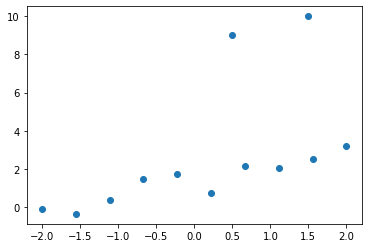

In [8]:
import math
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
num_samples = 10

input_data = np.linspace(-2, 2, num_samples)
labels = input_data + 1 + np.random.normal(0, 0.5, size=num_samples)

input_data = np.append(input_data, [0.5, 1.5])
labels = np.append(labels, [9.0, 10.0])

plt.scatter(input_data, labels)
plt.show()

In [9]:
def likelihood(labels, preds):
    result = 1/(np.sqrt(2*math.pi*0.1*0.1))*np.exp(-np.power(labels-preds,2)/(2*0.1*0.1))
    
    return np.prod(result)

def neg_log_likelihood(labels, preds):
    const_term = len(labels)*math.log(1/math.sqrt(2*math.pi*0.1*0.1))

    return (-1)*(const_term + 1/(2*0.1*0.1)*np.sum(-np.power(labels-preds,2)))

[MLE result] (blue)
slope: 1.4748 bias: 2.4784
likelihood: 0.0000e+00
negative log likelihood: 4.1298e+03

[MAP result] (orange)
slope: 1.1719 bias: 1.6628
likelihood: 0.0000e+00
negative log likelihood: 4.6645e+03


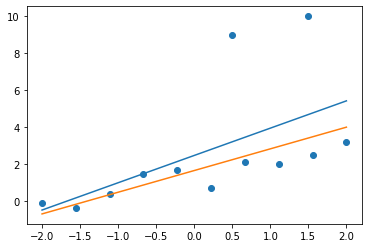

In [10]:
# X: 21x2 matrix, y: 21x1 matrix
# input_data 리스트를 column vector로 바꾼 다음 np.append 함수로 상수항을 추가합니다.
X = np.append(input_data.reshape((-1, 1)), np.ones((num_samples+2, 1)), axis=1)
y = labels

# MLE 파라미터 계산식
mle_theta_1, mle_theta_0 = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
# MAP 파라미터 계산식
map_theta_1, map_theta_0 = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)+(0.1*0.1)/(0.04*0.04)*np.eye(2)), X.T), y)

print('[MLE result] (blue)')
print('slope: '+'%.4f'%mle_theta_1+' bias: '+'%.4f'%mle_theta_0)

mle_preds = mle_theta_1 * input_data + mle_theta_0
print('likelihood: '+'%.4e'%likelihood(labels, mle_preds))
print('negative log likelihood: '+'%.4e\n'%neg_log_likelihood(labels, mle_preds))

print('[MAP result] (orange)')
print('slope: '+'%.4f'%map_theta_1+' bias: '+'%.4f'%map_theta_0)

map_preds = map_theta_1 * input_data + map_theta_0
print('likelihood: '+'%.4e'%likelihood(labels, map_preds))
print('negative log likelihood: '+'%.4e'%neg_log_likelihood(labels, map_preds))

model_x = np.linspace(-2, 2, 50)
mle_model_y = mle_theta_1 * model_x + mle_theta_0
map_model_y = map_theta_1 * model_x + map_theta_0

plt.scatter(input_data, labels)
plt.plot(model_x, mle_model_y)
plt.plot(model_x, map_model_y)
plt.show()

- 파란색 직선과 주황색 직선은 각각 MLE, MAP을 이용해 찾은 모델을 나타낸다. 
- 파란색 직선은 이상치 데이터까지 포함한 negative log likelihood를 감소시키기 위해 직선이 위로 치우쳐서 아래쪽 10개 데이터의 경향성에서는 약간 벗어난다. 
- 주황색 직선은 이상치 데이터가 추가되어도 아래쪽 데이터에서 크게 벗어나지는 않고 있다. 
- 원래 데이터 분포에서 멀리 떨어진 이상치 데이터가 추가되었기 때문에, likelihood의 값은 언더플로우가 발생해서 0으로 표시된다. 
- MAP가 MLE에 비해 negative log likelihood 값이 크지만(likelihood가 작지만), 이상치 데이터가 추가되었을 때 모델 파라미터의 변화는 MLE보다 작다. 

## 회고
- Fundamentals 노드 치고 굉장히 난해하면서 또 중요하게 생각되는 부분을 다루고 있어서 머리가 아팠다. 
- 현재 밀린 노드와 스터디 발표 준비가 겹쳐 자세히 보지 못했고, 여유가 생길 때 노션이나 블로그에 다시 공부하면서 정리할 예정이다. 